In [68]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.covariance import EmpiricalCovariance, MinCovDet
from sklearn.preprocessing import StandardScaler
# Libreria para estimar regresión
import statsmodels.formula.api as sm
# Libreria para metricas 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Libreria para separar en train y test
from sklearn.model_selection import train_test_split
# Libreria para estandarizar la data 
from sklearn.preprocessing import StandardScaler
# Seteo para que no se muestre notación científica
np.set_printoptions(suppress=True)

# Contexto Comercial - Resumen Dataset

## Se toma como fuente de información, las oportunidades de negocio registradas por la fuerza comercial dentro del módulo de gestión comercial en un aplicativo CRM y que pertenecen a 3 entidades de un conglomerado financiero en Colombia.

## Estas oportunidades de negocio están dirigidas a

### Empresas que nunca han tenido vínculo comercial con el grupo, son mercado objetivo y por ende podrían llegar a adquirir alguno de los productos ofrecidos.

### Empresas que, aunque ya se encuentran vinculadas, se les puede ofrecer productos distintos a los que ya cuenta dentro de su portafolio.

## Para este análisis, se cuenta con la base de datos de las oportunidades de negocio de un grupo económico del sector financiero desde 2020 a mayo de 2023.

## La información contiene las fechas en que fueron creadas las oportunidades, si estas fueron ganadas, perdidas o continúan abiertas, así como la etapa de venta de cada una. Para el caso de las oportunidades ganadas o perdidas, se cuenta con el motivo por el cual se ganaron o perdieron dichas oportunidades.

## También se relaciona el producto que se pretende vender o que se vendió en cada oportunidad de negocio y el vendedor asociado a cada oportunidad de venta, junto son su segmento y zona del país donde trabaja.

# DATA_SET_1 OPORTUNIDADES

In [69]:
nueva_ruta = "D:\CF0163JHG\Downloads\CODERHOUSE\CURSO_PYTHON\DATA_STORY_TELLING"
os.chdir(nueva_ruta)

# Este Dataset cuenta con la base de datos de las oportunidades de negocio de un grupo económico del sector financiero desde 2020 a la fecha

## Variables más representativas:
## Etapa de la Oportunidad (10%, 20%, 40%, 70%, 90%, 100%)
## Estado (Abierta, Perdida, Ganada)
## Fecha de creación en el aplicativo
## Fecha esperada/tentativa de cierre
## Fecha real de cierre (Solo para las ganadas)
## Nombre del cliente
## Segmento vendedor
## Plaza o región donde se encuentra el vendedor
## Nombre del producto
## Monto esperado que se pretende vender

### *Podriamos analizar los productos más vendidos y a través de qué segmentos / Comportamiento de Ventas por segmento y plaza

### *Análisis de oportunidades ganadas, en qué fechas, productos, etc.


In [70]:
df_1 = pd.read_excel("OPTYS_VENTA_ENTREGA_1.xlsx")
pd.set_option('display.float_format', '{:.0f}'.format)
descripcion = df_1.describe()
print(descripcion)
print(df_1.head())
print(df_1.shape)
df_1.describe()

       NUM_OPT  CANTIDAD  ETAPA_NUM  GANADA  ANIO  ID_CLIENTE  Latitud  \
count     5904      5904       5904    5904  5904        5904     5904   
mean      2952         1         62       0  2021   843715786        6   
std       1704         0         38       0     1    39801956        2   
min          1         1         10       0  2020   779948024        3   
25%       1477         1         20       0  2020   809969441        5   
50%       2952         1         70       0  2021   870148186        5   
75%       4428         1        100       1  2022   880278776        7   
max       5904         1        100       1  2023   881616179       11   

       Longitud  MONTO_ESPERADO_USD  INGRESO_ESPERADO_USD  
count      5904                5904                  5904  
mean        -75              706973                  1536  
std           1              859731                 36607  
min         -77              100000                     0  
25%         -75              2916

,NUM_OPT,CANTIDAD,ETAPA_NUM,GANADA,ANIO,ID_CLIENTE,Latitud,Longitud,MONTO_ESPERADO_USD,INGRESO_ESPERADO_USD
count,5904,5904,5904,5904,5904,5904,5904,5904,5904,5904
mean,2952,1,62,0,2021,843715786,6,-75,706973,1536
std,1704,0,38,0,1,39801956,2,1,859731,36607
min,1,1,10,0,2020,779948024,3,-77,100000,0
25%,1477,1,20,0,2020,809969441,5,-75,291604,0
50%,2952,1,70,0,2021,870148186,5,-74,483090,0
75%,4428,1,100,1,2022,880278776,7,-74,674577,110
max,5904,1,100,1,2023,881616179,11,-73,4644639,2207018


# Contexto analítico - Descripción de la temática de los datos

### Para este análisis, se cuenta con la base de datos de las oportunidades de negocio de un grupo económico del sector financiero desde 2020 a la fecha.

### La información contiene las fechas en que fueron creadas las oportunidades, si estas fueron ganadas, perdidas o continúan abiertas, así como la etapa de venta de cada una. Para el caso de las oportunidades ganadas o perdidas, se cuenta con el motivo por el cual se ganaron o perdieron dichas oportunidades.

### También se relaciona el producto que se pretende vender o que se vendió en cada oportunidad de negocio y el vendedor asociado a cada oportunidad de venta, junto son su segmento y zona del país donde trabaja.


# Problemática Comercial
### Los líderes comerciales necesitan conocer resultados que permitan medir y analizar:

### 1. Ventas cerradas
### 2. Montos de las ventas
### 3. Ventas distribuidas por segmentos, zonas y comerciales

### Sin estos datos, les es complicado tomar decisiones acertadas y es más difícil implementar estrategias orientadas a la consecución de negocios nuevos.

# OBJETIVO

### Después de hacer el análisis de los ítems anteriores, los líderes comerciales contarán con información clara y oportuna para la toma de decisiones acertadas e informadas.
### Adicionalmente, estarán en capacidad de implementar estrategias que conduzcan a una mayor cantidad de negocio cerrados.

# Bivariada_barplot

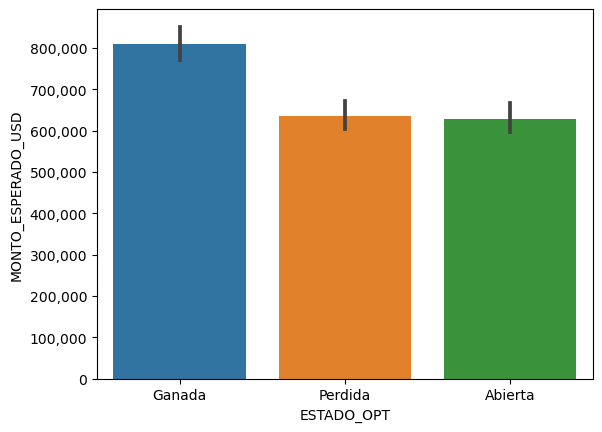

In [71]:
sns.barplot(data = df_1,
           x = 'ESTADO_OPT',
           y = 'MONTO_ESPERADO_USD')

plt.gca().yaxis.set_major_formatter('{:.0f}'.format)  # No Mostrar 2 decimales en el eje y

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))  # Mostrar formato numérico con puntos en el eje y



## Teniendo en cuenta el estado de las oprtunidades, las ganadas representan el mayor monto esperado del negocio

### 50% de las oportunidades ganadas están en el rango de 0 a 800.000 dólares
### El mayor monto de oportunidad corresponde a oportunidades ganadas.

# Univariada_Histograma

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '100% - Cierre negocio'),
  Text(1, 0, '70% - Negociación'),
  Text(2, 0, '40% - Presentación solución'),
  Text(3, 0, '10% - Calificación'),
  Text(4, 0, '20% - Descubrimiento'),
  Text(5, 0, '90% - Aceptación')])

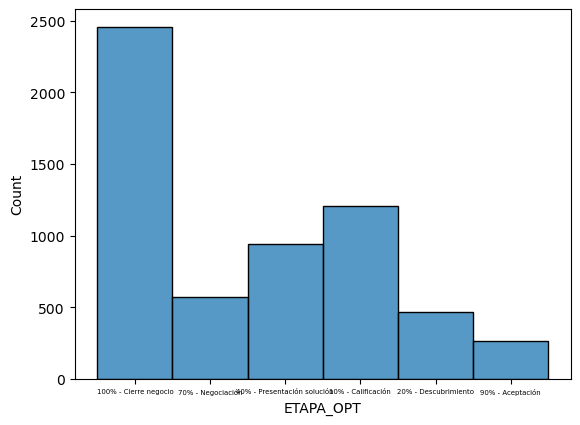

In [74]:
plt.figure()
sns.histplot(data = df_1,
                x = 'ETAPA_OPT')
plt.xticks(fontsize=5)


## La mayor cantidad de Oportunidades se encuentran ganadas o etapa del 100%, seguida de las etapa 10%

## La gráfica es asimétrica, donde la mayor cantidad de OPortunidades están en la etapa del 100%

# Outliers

In [75]:
variable_target = df_1['MONTO_ESPERADO_USD']
variable_target.describe()

count      5904
mean     706973
std      859731
min      100000
25%      291604
50%      483090
75%      674577
max     4644639
Name: MONTO_ESPERADO_USD, dtype: float64

In [76]:
# Metodo 1: IQR 
primer_cuartil = variable_target.quantile(0.25)
tercer_cuartil = variable_target.quantile(0.75)
rango_intercuartilico = tercer_cuartil - primer_cuartil

# Limites: 
limite_inf = primer_cuartil - (1.5 * rango_intercuartilico)
limite_sup = tercer_cuartil + (1.5 * rango_intercuartilico)

print(limite_inf,limite_sup)

-282856.5 1249037.5


In [77]:
# Identifico outliers: 
df_1['Otlier_IQR'] = np.where((df_1['MONTO_ESPERADO_USD'] < limite_inf) | (df_1['MONTO_ESPERADO_USD'] > limite_sup),1,0)
df_1['Otlier_IQR'].value_counts()

0    5324
1     580
Name: Otlier_IQR, dtype: int64

(0.0, 5000000.0)

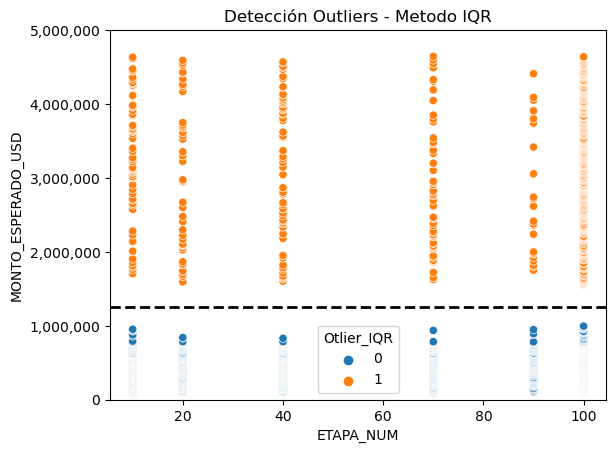

In [78]:
# Grafico 
plt.figure()
sns.scatterplot(data = df_1,
                x = 'ETAPA_NUM',
                y = 'MONTO_ESPERADO_USD',
               hue = 'Otlier_IQR')
plt.axhline(y = limite_inf, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Inferior',
            linewidth = 2)
plt.axhline(y = limite_sup, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Detección Outliers - Metodo IQR')


plt.gca().yaxis.set_major_formatter('{:.0f}'.format)  # No Mostrar 2 decimales en el eje y

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))  # Mostrar formato numérico con puntos en el eje y

plt.ylim(0, 5000000)

### Podemos ver que la gran mayoría de las Oportunidades, tienen montos inferiores al millón de dólares, por lo que los Outliers son las que están pr encima de este valor.

# Outliers: Análisis Multivariado

In [79]:
# Correlación 
df_1[['ETAPA_NUM','MONTO_ESPERADO_USD']].corr(method='pearson')

,ETAPA_NUM,MONTO_ESPERADO_USD
ETAPA_NUM,1,0
MONTO_ESPERADO_USD,0,1


In [80]:
# Metodo 3: Distancia Media Multivariado
# Defino función: 
def outlier_euclideano_d(x,cutoff):
  # x: dataframe con valors numericos normalizados 
  result_ = pd.Series([0] * len(x.iloc[:,1]))
  data_mean = x.mean() # media de los datos_
  dist = np.sqrt(np.sum(((x-data_mean) ** 2),axis=1)) #Distancia euclideana 
  dist_mean = dist.mean() #media de las distancia
  dist_zscore = np.abs((dist - dist_mean) / dist.std())#z-score para las distancias
  result_[((dist_zscore > 3))] = 1
  return result_

In [81]:
# Aplicar la funcion
df_1['Otlier_DistanciaMedia_Mult'] = outlier_euclideano_d(df_1[['ETAPA_NUM','MONTO_ESPERADO_USD']],3)
df_1.head()

,ID_OPT,NUM_OPT,CANTIDAD,NOMBRE_OPT,ETAPA_OPT,ETAPA_NUM,ESTADO_OPT,GANADA,FECHA_CREACION,ANIO,...,SEGMENTO_VENDEDOR,PLAZA_VENDEDOR,Latitud,Longitud,PRODUCTO,ENTIDAD,MONTO_ESPERADO_USD,INGRESO_ESPERADO_USD,Otlier_IQR,Otlier_DistanciaMedia_Mult
0,244917,1,1,OPA Grupo sura,100% - Cierre negocio,100,Ganada,1,2022-02-16,2022,...,BANCA PRIVADA,CENTRO,5,-74,RENTA VARIABLE,COMISIONISTA,100000,0,0,0
1,21282,750,1,VISITA DILITENCIAR DOC CB/ MARZO 02/20,100% - Cierre negocio,100,Ganada,1,2020-03-02,2020,...,BANCA PRIVADA,NORTE,11,-75,FIC VALOR PLUS,FIDUCIARIA,100117,0,0,0
2,21327,751,1,Operación de Factoring,100% - Cierre negocio,100,Ganada,1,2020-03-06,2020,...,NEGOCIOS FIDUCIARIOS,OCCIDENTE,3,-77,FACTORING - N.F,FIDUCIARIA,100250,0,0,0
3,22115,752,1,actualizacion e incremento saldos,70% - Negociación,70,Perdida,0,2020-03-09,2020,...,CORPORATIVO,NORTE,11,-75,FIC VALOR PLUS,FIDUCIARIA,100383,0,0,0
4,229889,753,1,POSIBILIDAD VINC MANEJO DE RECURSOS / DIC 1-21,70% - Negociación,70,Perdida,0,2021-12-02,2021,...,BANCA PRIVADA,NORTE,11,-75,FIC VALOR PLUS,FIDUCIARIA,100516,0,0,0


(0.0, 5000000.0)

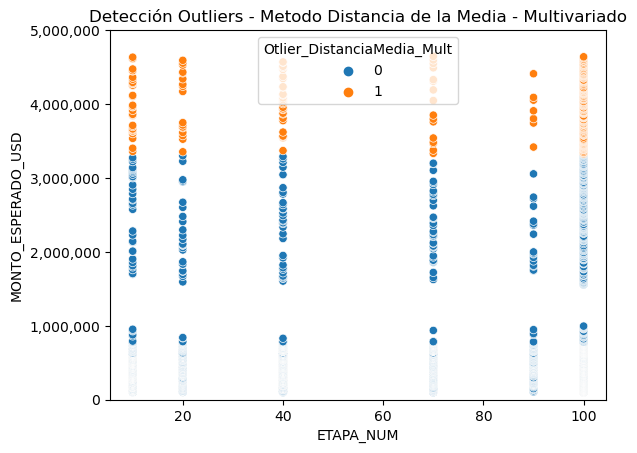

In [82]:
# Grafico 
plt.figure()
sns.scatterplot(data = df_1,
                x = 'ETAPA_NUM',
                y = 'MONTO_ESPERADO_USD',
               hue = 'Otlier_DistanciaMedia_Mult')
plt.title('Detección Outliers - Metodo Distancia de la Media - Multivariado')

plt.gca().yaxis.set_major_formatter('{:.0f}'.format)  # No Mostrar 2 decimales en el eje y

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))  # Mostrar formato numérico con puntos en el eje y

plt.ylim(0, 5000000)

## En este modelo, los Outliers corresponden a las Oportunidades con montos superiores a los 3 millones de dólares.

# Gráfico de Radar

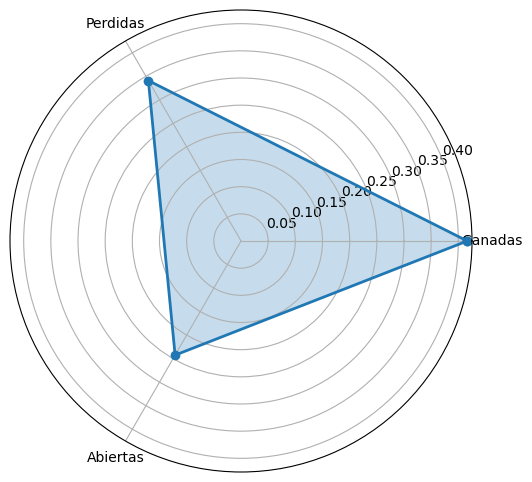

In [83]:
# Grafico radar: uno solo

# Categorias a presentar:
categorias = ['Ganadas', 'Perdidas', 'Abiertas']

# Valores
Ganadas = (df_1['ESTADO_OPT'] == 'Ganada').sum() / df_1['ESTADO_OPT'].count()
Perdidas = (df_1['ESTADO_OPT'] == 'Perdida').sum() / df_1['ESTADO_OPT'].count()
Abiertas = (df_1['ESTADO_OPT'] == 'Abierta').sum() / df_1['ESTADO_OPT'].count()




valores = [Ganadas, Perdidas, Abiertas]

# Calcular el ángulo para cada categoría
num_categorias = len(categorias)
angulos = np.linspace(0, 2 * np.pi, num_categorias, endpoint=False).tolist()
angulos += angulos[:1]

# Agregar el primer valor al final para cerrar el gráfico
valores += valores[:1]

# Crear el gráfico radar
radar = plt.figure(figsize=(6, 6))
plt.polar(angulos, valores, 'o-', linewidth=2)

# Personalizar los ángulos y etiquetas en el eje radial
plt.xticks(angulos[:-1], categorias)

# Rellenar el área bajo el gráfico radar
plt.fill(angulos, valores, alpha=0.25)

# Mostrar el gráfico
plt.show()

## Podemos ver la distribución de las oportunidades de negocio de acuerdo a su estado, donde la mayor cantidad de oporutnidades de negocio se ganaron.

# PREGUNTAS DE INTERÉS

### Podemos predecir la cantidad de oportunidades que se van a generar en el futuro?
### Podemos saber qué productos generarán más oportunidades ganadas?
### Podemos saber qué productos generarán los mayores montos en oportunidades ganadas?


## OBJETIVO: Predecir el volumen de ventas a partir de Oportunidades de negocio

# Variable Target: Monto Oportunidad en dólares

In [84]:
variable_target = df_1['MONTO_ESPERADO_USD']
variable_target.describe()

count      5904
mean     706973
std      859731
min      100000
25%      291604
50%      483090
75%      674577
max     4644639
Name: MONTO_ESPERADO_USD, dtype: float64

(0.0, 5000000.0)

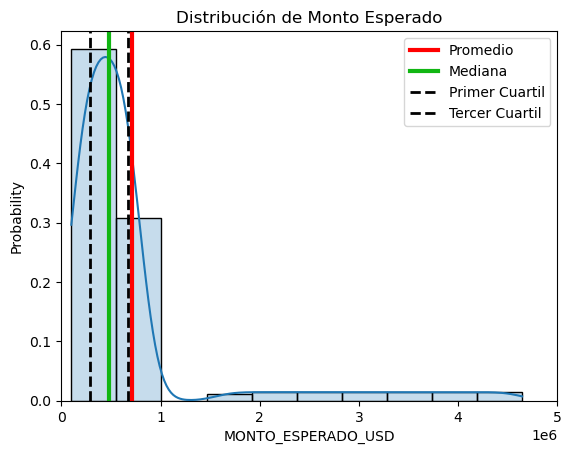

In [85]:
# Histograma variable target 
# Primero calculo algunas medidas que quiero presentar 
media = variable_target.mean()
mediana = variable_target.median()
primer_cuartil = variable_target.quantile(0.25)
tercer_cuartil = variable_target.quantile(0.75)

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df_1,
             x = 'MONTO_ESPERADO_USD',
             bins = 10,            
             alpha = 0.25,
             kde = True,
             stat='probability')
# Agrego linea de promedio 
plt.axvline(x = media, 
            color = 'red', 
            linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
# Agrego linea de mediana 
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
# Agrego linea de primer cuartil 
plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
# Agrego linea de tercer cuartil 
plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()

plt.title('Distribución de Monto Esperado')

ax = plt.gca()

plt.xlim(0, 5000000)


## Análisis Variable Target: Monto Esperado

#### Se puede observar que la variable tiene una distribución asimétrica positiva (la mediana es menor que el promedio), concentrando gla mayor cantidad de oportunidades en montos hasta un millón de dólares, y observando muy pocos registros en valores altos.

#### Esto indicaría que hay muy pocas negociaciones con montos miuy elevados.


# Exploración de valores vacíos
### A continuación se evaluará la precencia de valores vacíos en las variables disponibles.

In [86]:
# Calculo y muestro variables con vacíos 
valores_nulos  = df_1.isnull().sum()
columnas_con_nulos = valores_nulos[valores_nulos > 0]
print('Cantidad de columnas con valores vacíos:')
print(columnas_con_nulos.shape)
print('')
print('Variables con valores vacíos: ')
print(columnas_con_nulos.sort_values(ascending=False))

Cantidad de columnas con valores vacíos:
(3,)

Variables con valores vacíos: 
FECHA_CIERRE               3445
MOTIVO_GANANCIA_PERDIDA    1432
Comentarios                 560
dtype: int64


## Los valores vacíos no afectan el análisis ya que no corresponden a ninguna de las variables analizadas

Text(0.5, 1.0, 'Distribución de Monto esperado transformado a Logaritmo')

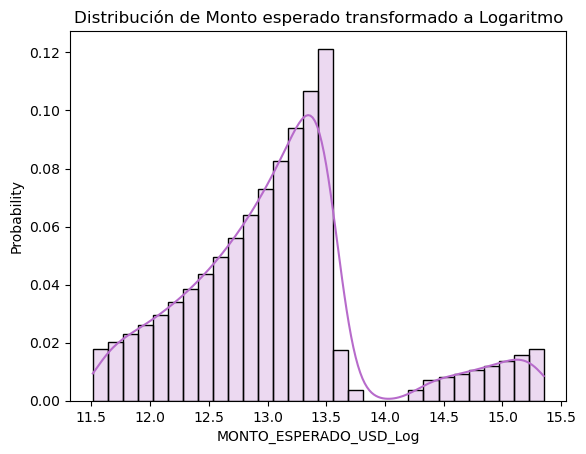

In [87]:
# Primero genero la variable logaritmica 
df_1['MONTO_ESPERADO_USD_Log'] = np.log(df_1['MONTO_ESPERADO_USD'])

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df_1,
             x = 'MONTO_ESPERADO_USD_Log',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#B76BCB')
plt.title('Distribución de Monto esperado transformado a Logaritmo')

## Conclusión:

#### De esta manera, se puede apreciar una distribución más similar a una distribución "Normal", obteniendo una forma más simétrica de la variable.

## Correlación

#### Lo próximo que analizaremos es la correlación entre cada variable disponible, y la variable target.

In [88]:
# Calculo matriz de correlación 
matriz_correlacion = df_1.corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella 
matriz_correlacion_target = matriz_correlacion['MONTO_ESPERADO_USD_Log']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido 
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación 
columnas_a_excluir = ['MONTO_ESPERADO_USD', 'MONTO_ESPERADO_USD_Log']
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion 
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

C:\Users\CF0163JHG\AppData\Local\Temp\ipykernel_23792\2700134935.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df_1.corr(method='pearson')


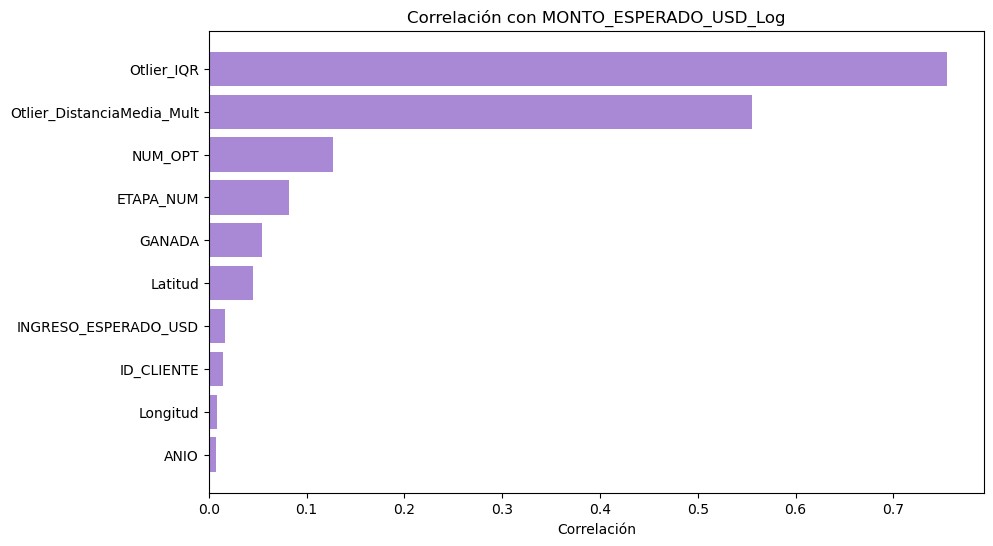

In [89]:
# Grafico el top 20 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:20]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con MONTO_ESPERADO_USD_Log')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

# OverallQual: Análisis Bivariado
### Lo próximo que haremos es ver cómo es la relación de esta variable con nuestro target. ¿Se visualiza la alta correlación que calculamos? Veamoslo en un gráfico.

Text(0.5, 1.0, 'Relación entre Logaritmo del Monto Esperado y Estado')

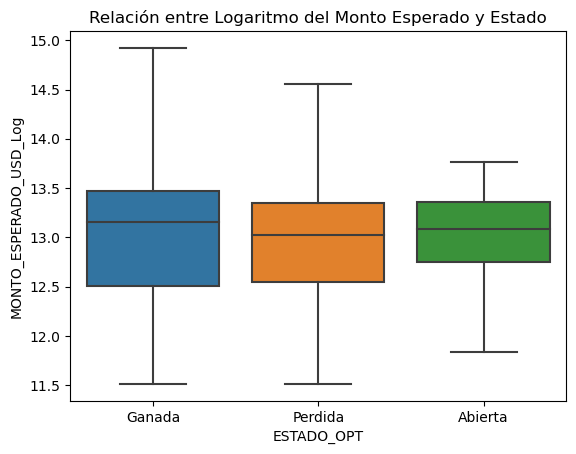

In [90]:
# Boxplot
plt.figure()
sns.boxplot(data = df_1,
            x = 'ESTADO_OPT',
            y = 'MONTO_ESPERADO_USD_Log', 
            showfliers = False)
plt.title('Relación entre Logaritmo del Monto Esperado y Estado')

# Conclusión

### Se puede apreciar que a la mayor cantdad de monto de las Oportunidades han sido ganadas.

## Variables con factor tiempo


Text(0.5, 1.0, 'Relación entre Mon esperado y Año de negociación')

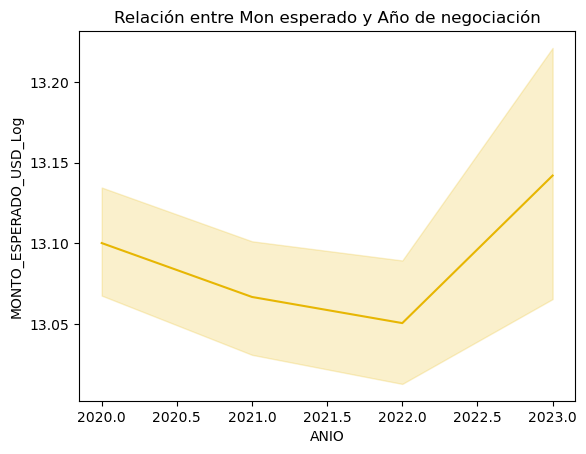

In [91]:
plt.figure()
sns.lineplot(data = df_1,
                x = 'ANIO',
                y = 'MONTO_ESPERADO_USD_Log',
                color = '#E7B602')
plt.title('Relación entre Mon esperado y Año de negociación')

# Feature selection: Filter Feature Selection

In [92]:
features_categoricas = df_1.select_dtypes(include=['object'])
features_categoricas.columns

Index(['ID_OPT', 'NOMBRE_OPT', 'ETAPA_OPT', 'ESTADO_OPT',
       'MOTIVO_GANANCIA_PERDIDA', 'Comentarios', 'NOMBRE_CLIENTE',
       'TIPO_ID_CLIENTE', 'VENDEDOR', 'SEGMENTO_VENDEDOR', 'PLAZA_VENDEDOR',
       'PRODUCTO', 'ENTIDAD'],
      dtype='object')

In [93]:
# Cuántos valores distintos tiene cada categoría?
valores_distintos = features_categoricas.nunique()
print(valores_distintos.sort_values(ascending=False))

ID_OPT                     5904
NOMBRE_OPT                 5127
NOMBRE_CLIENTE             2894
Comentarios                 155
VENDEDOR                     85
PRODUCTO                     47
MOTIVO_GANANCIA_PERDIDA      24
ETAPA_OPT                     6
SEGMENTO_VENDEDOR             5
PLAZA_VENDEDOR                5
ENTIDAD                       4
ESTADO_OPT                    3
TIPO_ID_CLIENTE               1
dtype: int64


# One-Hot Encoding

In [94]:
# Primero las selecciono
col_aTransformar = valores_distintos.index[valores_distintos<=5]
col_aTransformar

Index(['ESTADO_OPT', 'TIPO_ID_CLIENTE', 'SEGMENTO_VENDEDOR', 'PLAZA_VENDEDOR',
       'ENTIDAD'],
      dtype='object')

In [95]:
# Patra transformarlas, vamos a usar el método get_dummies de pandas: 
df_dummies = pd.get_dummies(df_1[col_aTransformar],drop_first=True)
df_dummies.head()

,ESTADO_OPT_Ganada,ESTADO_OPT_Perdida,SEGMENTO_VENDEDOR_BANCA PRIVADA,SEGMENTO_VENDEDOR_CORPORATIVO,SEGMENTO_VENDEDOR_INSTITUCIONAL,SEGMENTO_VENDEDOR_NEGOCIOS FIDUCIARIOS,PLAZA_VENDEDOR_CENTRO,PLAZA_VENDEDOR_NORTE,PLAZA_VENDEDOR_OCCIDENTE,PLAZA_VENDEDOR_ORIENTE,ENTIDAD_CORPORACION,ENTIDAD_FIDUCIARIA,ENTIDAD_FONDO PENSIONES
0,1,0,1,0,0,0,1,0,0,0,0,0,0
1,1,0,1,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,1,0,0,1,0,0,1,0
3,0,1,0,1,0,0,0,1,0,0,0,1,0
4,0,1,1,0,0,0,0,1,0,0,0,1,0


In [96]:
print(df_1.shape,df_dummies.shape)

(5904, 29) (5904, 13)


In [97]:
# Junto los resultados 
df_1 = pd.concat([df_1, df_dummies], axis=1)
df_1.head()

,ID_OPT,NUM_OPT,CANTIDAD,NOMBRE_OPT,ETAPA_OPT,ETAPA_NUM,ESTADO_OPT,GANADA,FECHA_CREACION,ANIO,...,SEGMENTO_VENDEDOR_CORPORATIVO,SEGMENTO_VENDEDOR_INSTITUCIONAL,SEGMENTO_VENDEDOR_NEGOCIOS FIDUCIARIOS,PLAZA_VENDEDOR_CENTRO,PLAZA_VENDEDOR_NORTE,PLAZA_VENDEDOR_OCCIDENTE,PLAZA_VENDEDOR_ORIENTE,ENTIDAD_CORPORACION,ENTIDAD_FIDUCIARIA,ENTIDAD_FONDO PENSIONES
0,244917,1,1,OPA Grupo sura,100% - Cierre negocio,100,Ganada,1,2022-02-16,2022,...,0,0,0,1,0,0,0,0,0,0
1,21282,750,1,VISITA DILITENCIAR DOC CB/ MARZO 02/20,100% - Cierre negocio,100,Ganada,1,2020-03-02,2020,...,0,0,0,0,1,0,0,0,1,0
2,21327,751,1,Operación de Factoring,100% - Cierre negocio,100,Ganada,1,2020-03-06,2020,...,0,0,1,0,0,1,0,0,1,0
3,22115,752,1,actualizacion e incremento saldos,70% - Negociación,70,Perdida,0,2020-03-09,2020,...,1,0,0,0,1,0,0,0,1,0
4,229889,753,1,POSIBILIDAD VINC MANEJO DE RECURSOS / DIC 1-21,70% - Negociación,70,Perdida,0,2021-12-02,2021,...,0,0,0,0,1,0,0,0,1,0


### Gracias a este método, podemos transformar las variables cualitativas en cuantitativas para facilitar el análisis.

# Target Encoding

In [98]:
# Para el resto de las variables, evaluemos el uso de Target Encoding. 
# Veamos el ejemplo de la variable ETAPA OPT
# ETAPA OPT: El estado de avance de cada oprtunidad de negocio
resultados = df_1.groupby('ETAPA_OPT').agg(
    Cant = ('MONTO_ESPERADO_USD', 'count'),              
    Promedio = ('MONTO_ESPERADO_USD', 'mean'),            
    Mediana = ('MONTO_ESPERADO_USD', 'median')    
).reset_index()
resultados

,ETAPA_OPT,Cant,Promedio,Mediana
0,10% - Calificación,1204,574071,437206
1,100% - Cierre negocio,2459,810321,518136
2,20% - Descubrimiento,465,666542,447912
3,40% - Presentación solución,940,639849,482359
4,70% - Negociación,574,698581,521528
5,90% - Aceptación,262,678707,484420


## Como la etapa 10% y 20% es muy temprana vamos a juntarlos en una misma categoría llamada "10% - Etapa inicial"

In [99]:
# Genero la nueva variable
df_1['ETAPA_OPT_Agg'] = np.where(df_1['ETAPA_OPT'].isin(['100% - Cierre negocio','40% - Presentación solución','70% - Negociación','90% - Aceptación']),
                                df_1['ETAPA_OPT'],
                                '10% - Etapa inicial')
# Genero la nueva agrupación 
resultados = df_1.groupby('ETAPA_OPT_Agg').agg(
    Cant = ('MONTO_ESPERADO_USD', 'count'),              
    Promedio = ('MONTO_ESPERADO_USD', 'mean'),            
    Mediana = ('MONTO_ESPERADO_USD', 'median')    
).reset_index()
resultados

,ETAPA_OPT_Agg,Cant,Promedio,Mediana
0,10% - Etapa inicial,1669,599835,440863
1,100% - Cierre negocio,2459,810321,518136
2,40% - Presentación solución,940,639849,482359
3,70% - Negociación,574,698581,521528
4,90% - Aceptación,262,678707,484420


In [100]:
# Joineo la mediana 
resultados.rename(columns={'Mediana': 'Mediana_ETAPA_OPT'}, inplace=True)
df = df_1.merge(resultados[['ETAPA_OPT_Agg','Mediana_ETAPA_OPT']],
              left_on = 'ETAPA_OPT_Agg',
              right_on = 'ETAPA_OPT_Agg',
              how = 'left')

# Variables con factor tiempo

### En este caso, tenemos disponible la siguiente información respecto al tiempo:

#### * ANIO: Año de venta
#### * FECHA CREACION: Fecha en que se crea la Oportunidad en el sistema
#### * FECHA ESPERADA CIERRE: Fecha en la que el comercial espera cerrar el negocio
#### * FECHA CIERRE: Fecha en la que se cerró el negocio, si aplica

In [101]:
# Construcción de las variables : 
df_1['Antig_Opty_Esper'] = df_1['FECHA_CREACION'] - df_1['FECHA_ESPERADA_CIERRE']
df_1['Antig_Opty_Ganada'] = df_1['FECHA_CREACION'] - df_1['FECHA_CIERRE']

## Matriz de Correlación

In [102]:
# Selecciono las variables que quiero analizar 
variables_anios = ['FECHA_CREACION','FECHA_ESPERADA_CIERRE','FECHA_CIERRE']
target_nousar = ['MONTO_ESPERADO_USD']
agg_nousar = ['GANADA']

df_analizar = df_1[list(set(df_1.columns) - set(features_categoricas))]
df_analizar = df_analizar[list(set(df_analizar.columns) - set(variables_anios))]
df_analizar = df_analizar[list(set(df_analizar.columns) - set(target_nousar))]
df_analizar = df_analizar[list(set(df_analizar.columns) - set(agg_nousar))]

# Calculo matriz de correlación 
matriz_correlacion = df_analizar.corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella 
matriz_correlacion_target = matriz_correlacion['MONTO_ESPERADO_USD_Log']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido 
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación 
columnas_a_excluir = ['MONTO_ESPERADO_USD_Log']
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion 
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

C:\Users\CF0163JHG\AppData\Local\Temp\ipykernel_23792\2803557612.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df_analizar.corr(method='pearson')


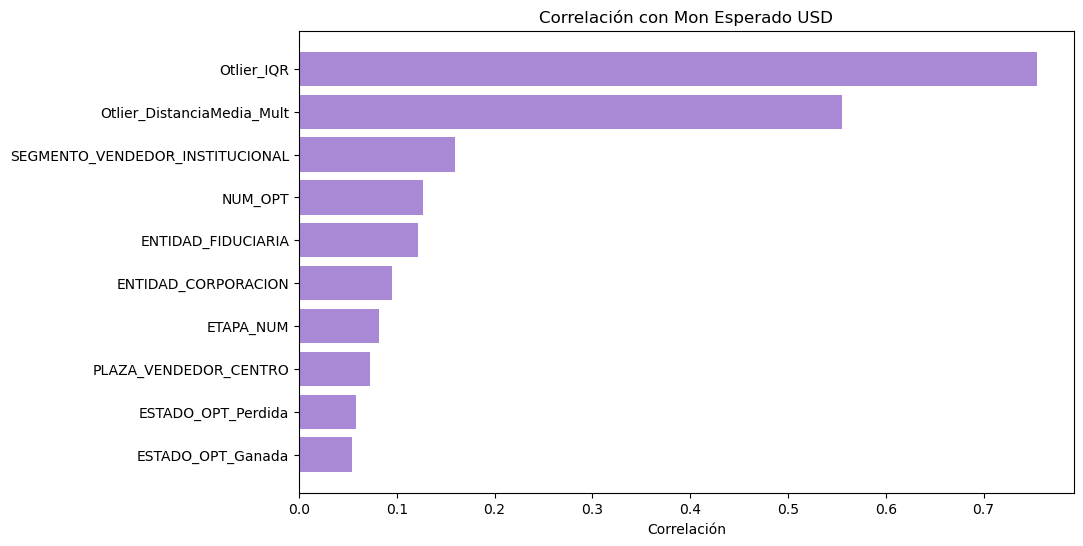

In [103]:
# Grafico el top 10 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:10]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con Mon Esperado USD')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

# Análisis multivariado

In [104]:
# Elijo el top 10 de variables más correlacionadas con el target
features_selec = matriz_correlacion_target.index[0:10]
features_selec

Index(['Otlier_IQR', 'Otlier_DistanciaMedia_Mult',
       'SEGMENTO_VENDEDOR_INSTITUCIONAL', 'NUM_OPT', 'ENTIDAD_FIDUCIARIA',
       'ENTIDAD_CORPORACION', 'ETAPA_NUM', 'PLAZA_VENDEDOR_CENTRO',
       'ESTADO_OPT_Perdida', 'ESTADO_OPT_Ganada'],
      dtype='object')

<Axes: >

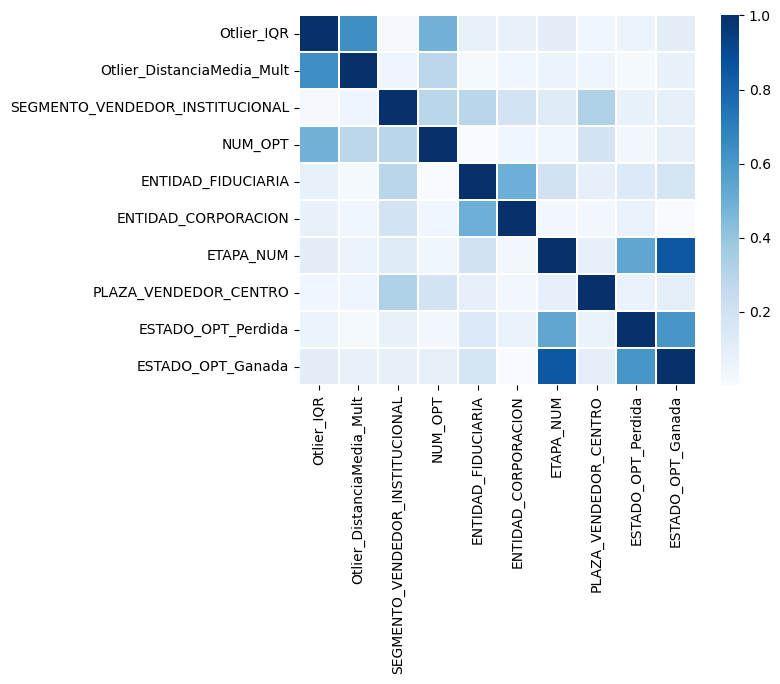

In [105]:
matriz_correlacion = df_analizar[features_selec].corr(method='pearson')
sns.heatmap(abs(matriz_correlacion),
           #cbar=False,
           linewidths = 0.3,
           cmap = 'Blues')

In [106]:
# Ejemplo para ubicarlos 
OverallQual_CORR = matriz_correlacion['Otlier_IQR']
OverallQual_CORR[(abs(OverallQual_CORR)>0.6) & (OverallQual_CORR != 1)]

Otlier_DistanciaMedia_Mult   1
Name: Otlier_IQR, dtype: float64

In [107]:
# Chequeemos que sean todos números: 
tipos = df_analizar[features_selec].dtypes
tipos.groupby(tipos).size()
### OK

uint8    6
int32    1
int64    3
dtype: int64

In [108]:
# Chequeemos vacíos: 
vacios = df_analizar[features_selec].isnull().sum()
vacios[vacios>0]
# OK

Series([], dtype: int64)

# TRAIN y TEST

In [109]:
# Separo usando el paquete sklearn
df_train,df_test = train_test_split(df_analizar,
                                    test_size = 0.3, #Porcentaje de muestra test 
                                    random_state = 42) #Semilla

In [110]:
print('MONTO_ESPERADO_USD_Log Promedio en TRAIN')
print(df_train['MONTO_ESPERADO_USD_Log'].mean())
print('MONTO_ESPERADO_USD_Log Promedio en TEST')
print(df_test['MONTO_ESPERADO_USD_Log'].mean())

MONTO_ESPERADO_USD_Log Promedio en TRAIN
13.095360681428364
MONTO_ESPERADO_USD_Log Promedio en TEST
13.042917525062668


# Modelo 1

In [111]:
# Ajusto el modelo
model_formula = 'MONTO_ESPERADO_USD_Log ~ ' + ' + '.join(df_train[features_selec].columns)
lm1   = sm.ols(formula = model_formula, data = df_train).fit()

In [112]:
coeficientes = lm1.params
print('Coeficientes:')
print(coeficientes.head(21).round(6))

Coeficientes:
Intercept                         12
Otlier_IQR                         3
Otlier_DistanciaMedia_Mult         0
SEGMENTO_VENDEDOR_INSTITUCIONAL   -0
NUM_OPT                            0
ENTIDAD_FIDUCIARIA                -0
ENTIDAD_CORPORACION                0
ETAPA_NUM                         -0
PLAZA_VENDEDOR_CENTRO              0
ESTADO_OPT_Perdida                -0
ESTADO_OPT_Ganada                  0
dtype: float64


In [113]:
pvalores_1 = lm1.pvalues
print('P-Valores:')
print(pvalores_1.head(21).round(6).sort_values(ascending=False))

P-Valores:
ESTADO_OPT_Ganada                 1
PLAZA_VENDEDOR_CENTRO             0
ETAPA_NUM                         0
ESTADO_OPT_Perdida                0
SEGMENTO_VENDEDOR_INSTITUCIONAL   0
ENTIDAD_FIDUCIARIA                0
Intercept                         0
Otlier_IQR                        0
Otlier_DistanciaMedia_Mult        0
NUM_OPT                           0
ENTIDAD_CORPORACION               0
dtype: float64


In [114]:
# Genero columna de predicciones
df_train['Pred_1'] = lm1.predict(df_train)
df_test['Pred_1'] = lm1.predict(df_test)

# Modelo 2

In [115]:
mantener = pvalores_1.index[pvalores_1<=0.1]
mantener = mantener[mantener != 'Intercept']
mantener

Index(['Otlier_IQR', 'Otlier_DistanciaMedia_Mult',
       'SEGMENTO_VENDEDOR_INSTITUCIONAL', 'NUM_OPT', 'ENTIDAD_FIDUCIARIA',
       'ENTIDAD_CORPORACION', 'ESTADO_OPT_Perdida'],
      dtype='object')

In [116]:
# Ajusto el modelo
model_formula = 'MONTO_ESPERADO_USD_Log ~ ' + ' + '.join(df_train[mantener].columns)
lm2   = sm.ols(formula = model_formula, data = df_train).fit()

In [117]:
coeficientes = lm2.params
print('Coeficientes:')
print(coeficientes.head(21).round(6))

Coeficientes:
Intercept                         12
Otlier_IQR                         3
Otlier_DistanciaMedia_Mult         0
SEGMENTO_VENDEDOR_INSTITUCIONAL   -0
NUM_OPT                            0
ENTIDAD_FIDUCIARIA                -0
ENTIDAD_CORPORACION                0
ESTADO_OPT_Perdida                -0
dtype: float64


In [118]:
pvalores = lm2.pvalues
print('P-Valores:')
print(pvalores.head(21).round(6).sort_values(ascending=False))

P-Valores:
ESTADO_OPT_Perdida                0
SEGMENTO_VENDEDOR_INSTITUCIONAL   0
ENTIDAD_FIDUCIARIA                0
Intercept                         0
Otlier_IQR                        0
Otlier_DistanciaMedia_Mult        0
NUM_OPT                           0
ENTIDAD_CORPORACION               0
dtype: float64


In [119]:
# Genero columna de predicciones
df_train['Pred_2'] = lm2.predict(df_train)
df_test['Pred_2'] = lm2.predict(df_test)

# Comparar dos modelos

## Distribuciones

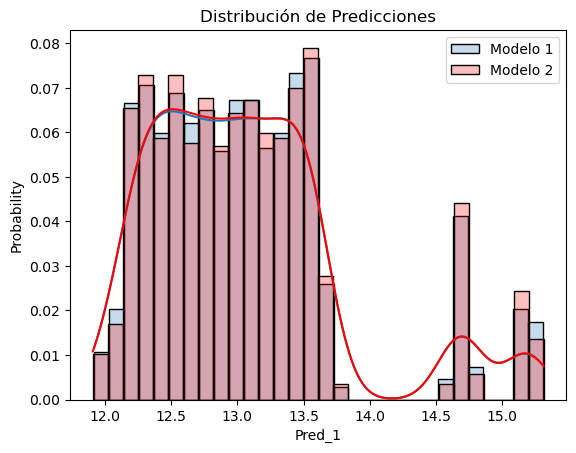

In [120]:
# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df_test,
             x = 'Pred_1',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
            label = 'Modelo 1')
sns.histplot(data  = df_test, 
             x = 'Pred_2', 
             bins = 30, 
             alpha = 0.25, 
             kde = True, 
             stat='probability', 
             color='red', 
             label='Modelo 2')

plt.title('Distribución de Predicciones')
plt.legend()
plt.show()

## Distribución del target por grupo de predicción

* Pred < 150000
* Pred entre 150000 y 250000
* Pred entre 250000 y 350000
* Pred entre 350000 y 450000
* Pred > 450000

In [121]:
# Calculo el exponencial
df_test['Pred_1_exp'] = np.exp(df_test['Pred_1'])
df_test['Pred_2_exp'] = np.exp(df_test['Pred_2'])
df_test['MONTO_ESPERADO_USD'] = np.exp(df_test['MONTO_ESPERADO_USD_Log'])

In [122]:
# Defino cortes 
bin_edges = [-9999, 150000, 250000, 350000, 450000, 999999999999]
bin_labels = ['< 150.000','150.000 a 250.000','250.000 a 350.000', '350.000 a 450.000', '> 450.000']

# Las categorizo
df_test['Pred_1_Bin'] = pd.cut(df_test['Pred_1_exp'], 
                                  bins = bin_edges, 
                                  labels = bin_labels, 
                                  include_lowest = True)

df_test['Pred_2_Bin'] = pd.cut(df_test['Pred_2_exp'], 
                                  bins = bin_edges, 
                                  labels = bin_labels, 
                                  include_lowest = True)


In [123]:
# Modelo 1
resumen_1 = df_test.groupby('Pred_1_Bin').agg(
    Cant = ('MONTO_ESPERADO_USD', 'count'),              
    Promedio = ('MONTO_ESPERADO_USD', 'mean'),            
    Mediana = ('MONTO_ESPERADO_USD', 'median')    
).reset_index()
resumen_1

,Pred_1_Bin,Cant,Promedio,Mediana
0,< 150.000,1,233325,233325
1,150.000 a 250.000,352,206170,164822
2,250.000 a 350.000,340,298512,298487
3,350.000 a 450.000,244,429710,429092
4,> 450.000,835,1101455,681327


In [124]:
# Modelo 2
resumen_2 = df_test.groupby('Pred_2_Bin').agg(
    Cant = ('MONTO_ESPERADO_USD', 'count'),              
    Promedio = ('MONTO_ESPERADO_USD', 'mean'),            
    Mediana = ('MONTO_ESPERADO_USD', 'median')    
).reset_index()
resumen_2

,Pred_2_Bin,Cant,Promedio,Mediana
0,< 150.000,1,233325,233325
1,150.000 a 250.000,351,206002,164622
2,250.000 a 350.000,344,298697,299085
3,350.000 a 450.000,242,431211,430023
4,> 450.000,834,1102181,681460


## Métricas
Calculemos el R cuadrado y el RMSE. 

In [125]:
rmse_1_test= mean_squared_error(df_test['MONTO_ESPERADO_USD_Log'], df_test['Pred_1'], squared=False)
r_squared_1_test = r2_score(df_test['MONTO_ESPERADO_USD_Log'], df_test['Pred_1'])
rmse_1_train = mean_squared_error(df_train['MONTO_ESPERADO_USD_Log'], df_train['Pred_1'], squared=False)
r_squared_1_train = r2_score(df_train['MONTO_ESPERADO_USD_Log'], df_train['Pred_1'])

In [126]:
rmse_2_test = mean_squared_error(df_test['MONTO_ESPERADO_USD_Log'], df_test['Pred_2'], squared=False)
r_squared_2_test = r2_score(df_test['MONTO_ESPERADO_USD_Log'], df_test['Pred_2'])
rmse_2_train = mean_squared_error(df_train['MONTO_ESPERADO_USD_Log'], df_train['Pred_2'], squared=False)
r_squared_2_train = r2_score(df_train['MONTO_ESPERADO_USD_Log'], df_train['Pred_2'])

In [127]:
metricas = pd.DataFrame(columns=['Poblacion', 'Metrica','Modelo','Valor'])

In [128]:
# RMSE
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'RMSE',
              'Modelo': 1,
              'Valor': rmse_1_test}
metricas = metricas.append(nuevo_dato, ignore_index=True)

nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'RMSE',
              'Modelo': 1,
              'Valor': rmse_1_train}
metricas = metricas.append(nuevo_dato, ignore_index=True)

nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'RMSE',
              'Modelo': 2,
              'Valor': rmse_2_test}
metricas = metricas.append(nuevo_dato, ignore_index=True)

nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'RMSE',
              'Modelo': 2,
              'Valor': rmse_2_train}
metricas = metricas.append(nuevo_dato, ignore_index=True)

C:\Users\CF0163JHG\AppData\Local\Temp\ipykernel_23792\1839116436.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(nuevo_dato, ignore_index=True)
C:\Users\CF0163JHG\AppData\Local\Temp\ipykernel_23792\1839116436.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(nuevo_dato, ignore_index=True)
C:\Users\CF0163JHG\AppData\Local\Temp\ipykernel_23792\1839116436.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(nuevo_dato, ignore_index=True)
C:\Users\CF0163JHG\AppData\Local\Temp\ipykernel_23792\1839116436.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [129]:
# R CUADRADO
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'R-2',
              'Modelo': 1,
              'Valor': r_squared_1_test}
metricas = metricas.append(nuevo_dato, ignore_index=True)

nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'R-2',
              'Modelo': 1,
              'Valor': r_squared_1_train}
metricas = metricas.append(nuevo_dato, ignore_index=True)

nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'R-2',
              'Modelo': 2,
              'Valor': r_squared_2_test}
metricas = metricas.append(nuevo_dato, ignore_index=True)

nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'R-2',
              'Modelo': 2,
              'Valor': r_squared_2_train}
metricas = metricas.append(nuevo_dato, ignore_index=True)

C:\Users\CF0163JHG\AppData\Local\Temp\ipykernel_23792\2494225854.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(nuevo_dato, ignore_index=True)
C:\Users\CF0163JHG\AppData\Local\Temp\ipykernel_23792\2494225854.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(nuevo_dato, ignore_index=True)
C:\Users\CF0163JHG\AppData\Local\Temp\ipykernel_23792\2494225854.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(nuevo_dato, ignore_index=True)
C:\Users\CF0163JHG\AppData\Local\Temp\ipykernel_23792\2494225854.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [130]:
metricas

,Poblacion,Metrica,Modelo,Valor
0,TEST,RMSE,1,0
1,TRAIN,RMSE,1,0
2,TEST,RMSE,2,0
3,TRAIN,RMSE,2,0
4,TEST,R-2,1,1
5,TRAIN,R-2,1,1
6,TEST,R-2,2,1
7,TRAIN,R-2,2,1


Text(0, 0.5, 'R-2')

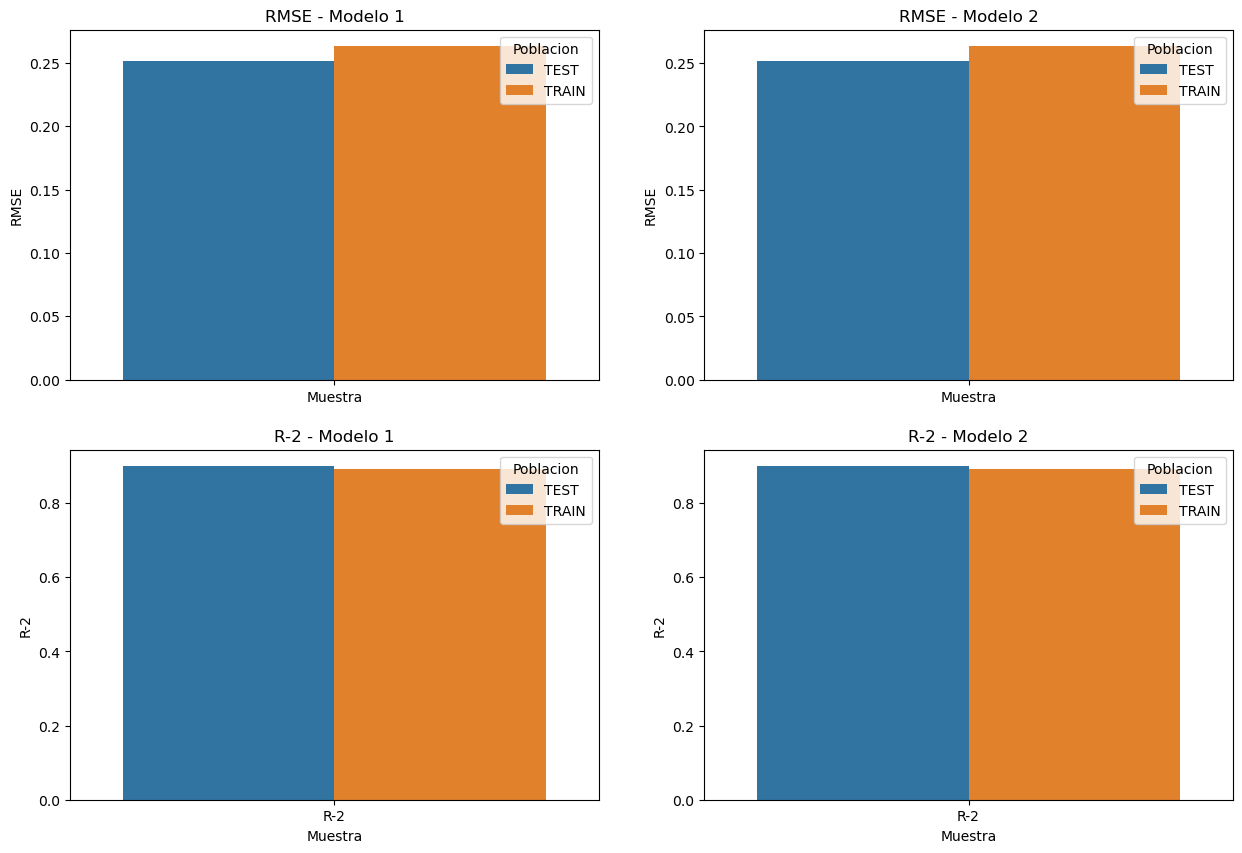

In [132]:
fig, ax = plt.subplots(nrows = 2,
                      ncols = 2,
                      figsize = (15,10),
                      sharex = True, 
                      sharey = False)

rmse_mod1 = (metricas['Metrica'] == 'RMSE') & (metricas['Modelo'] == 1)
rmse_mod2 = (metricas['Metrica'] == 'RMSE') & (metricas['Modelo'] == 2)
r_2_mod1 = (metricas['Metrica'] == 'R-2') & (metricas['Modelo'] == 1)
r_2_mod2 = (metricas['Metrica'] == 'R-2') & (metricas['Modelo'] == 2)

sns.barplot(data = metricas[rmse_mod1],
            x = 'Metrica',
            y = 'Valor',
            hue = 'Poblacion',
            ax = ax[0, 0])
ax[0, 0].set_title('RMSE - Modelo 1')
ax[0, 0].set_xlabel('Muestra')
ax[0, 0].set_ylabel('RMSE')

sns.barplot(data = metricas[rmse_mod2],
            x = 'Metrica',
            y = 'Valor',
            hue = 'Poblacion',
            ax = ax[0, 1])
ax[0, 1].set_title('RMSE - Modelo 2')
ax[0, 1].set_xlabel('Muestra')
ax[0, 1].set_ylabel('RMSE')

sns.barplot(data = metricas[r_2_mod1],
            x = 'Metrica',
            y = 'Valor',
            hue = 'Poblacion',
            ax = ax[1, 0])
ax[1, 0].set_title('R-2 - Modelo 1')
ax[1, 0].set_xlabel('Muestra')
ax[1, 0].set_ylabel('R-2')

sns.barplot(data = metricas[r_2_mod2],
            x = 'Metrica',
            y = 'Valor',
            hue = 'Poblacion',
            ax = ax[1, 1])
ax[1, 1].set_title('R-2 - Modelo 2')
ax[1, 1].set_xlabel('Muestra')
ax[1, 1].set_ylabel('R-2')

## De acuerdo a los resultados podemos concluir que el los modelos tienen buen ajuste a los datos.